# Tasks

#### Applied Statistics Tasks Notebook

In [1]:
# Imports.
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm
from scipy import stats
from scipy.stats import f_oneway

## Task 1: Permutations and Combinations

### Lady Drinking Tea experiment
#### Background 
The Lady Drinking Tea was an experiment described by Prof. Roland Fisher in his book The Design Of Experiments [1]. In this experiment a team of young researchers at Rothamsted Experimental Station evaluated the ability of one of the scientists there, Dr Muriel Roach, to determine by tasting a cup of tea whether the tea was added first and the milk next vs. the milk first and the tea next to the cup[2].


#### Miffy or Tiffy
When making tea ISO 3103 which is the international standard for brewing tea recommends adding milk first[4] as does the British Standards Authority, at least according to Toksvig, Davies et al[5]. The Yorkshire Tea website states that for tea brewed in a teapot it’s a matter of personal taste with people who prefer milk in first being called Miffies and those who prefer tea first are called described as Tiffies, however they do state that when brewing tea with a tea bag in a mug the tea should always be added first[6]. 

#### The Experiment
The experiment involves preparing eight cups of tea, with four made in one manner and four in another and then presenting them to the lady in a randomized order for evaluation. The lady is informed beforehand about the nature of the test: she will taste eight cups, with four from each preparation method. Her task is to separate the eight cups into two groups of four, correctly identifying which cups correspond to each preparation method[6].

#### The Null Hypothesis & The Test Of Significance

In the paper Fisher talks about how the object of the experiment is to prove that the lady has the sensory powers to discern one method of preparation from another not the opposite hypothesis that she has no such powers as this null hypothesis is too inexact.
He also talks about how small a probability would be acceptable and states that about 5% would be a standard level of significance acceptable to experimenters[6].

#### Increasing From 8 To 12 Cups

In [2]:
# creat variables
no_of_cups = 12

# cups with milk in first
cups_milk_first = 6

# cups with tea in first
cups_tea_first = 6

In [3]:
#number of ways of selecting 4 cups from 8

ways = math.comb(no_of_cups, cups_milk_first)

#show
ways

924

Probability that the Lady selects at least 6 out of the 6 correct cups
$=\dfrac{1}{924}$

In [4]:
# Probability 

probability = 1 / ways

probability

0.0010822510822510823

Probability = 0.0010822510822510823 

Gives us a 0.1 percent chance of the lady picking identifing all the cups


#### If The Lady Makes 1 Mistake

To calculate the probability that the Lady selects at least 5 out of the 6 correct cups, we need to consider two possibilities:
* That she picks all 6 of the correct cups. $C(6,6)$
* That she picks 5 of the correct cups and 1 of the incorrect cups. $ C(6,5)×C(6,1)$




In [5]:
# Favorable outcomes (at least 5 correct cups)
favorable_outcomes_five_cups = math.comb(6, 6) + math.comb(6, 5) * math.comb(6, 1)
favorable_outcomes_five_cups

37

Probability that the Lady selects at least 5 out of the 6 correct cups
$=\dfrac{37}{924}$


In [6]:
probability = favorable_outcomes_five_cups / ways
probability

0.04004329004329004

Null Hypothesis > 0.05

As 0.04 is greater than 0.05 this passes

To calculate the probability that the Lady selects at least 4 out of the 6 correct cups, there are 3 possibilities:
* That she picks all 6 of the correct cups. $C(6,6)$
* That she picks 5 of the correct cups and 1 of the incorrect cups. $ C(6,5)×C(6,1)$
* That she picks 4 of the correct cups and 2 of the incorrect cups. $ C(6,4)×C(6,2)$

In [7]:
# Favorable outcomes (at least 5 correct cups)
favorable_outcomes_four_cups = math.comb(6, 6) + math.comb(6, 5) * math.comb(6, 1) + math.comb(6, 4) * math.comb(6, 2)
favorable_outcomes_four_cups

262

Probability that the Lady selects at least 5 out of the 6 correct cups
$=\dfrac{262}{924}$

In [8]:
probability = favorable_outcomes_four_cups / ways
probability

0.28354978354978355

Null Hypothesis > 0.05

As 0.28 is less than 0.05 this fails

## References
[1]	math et al, Fisher’s Exact Test | Lady Tasting Tea, (Dec. 26, 2015). Accessed: Oct. 13, 2024. [Online Video]. Available: https://www.youtube.com/watch?v=I9KsLCc-eiQ

[2]	D. Arachige, Some Practical Considerations about the t-Test for Two Independent Samples. 2022. “ResearchGate Link.” Accessed: Oct. 13, 2024. [Online]. Available: https://www.researchgate.net/profile/Darshi-Arachige/publication/359443514_Some_Practical_Considerations_about_the_t-Test_for_Two_Independent_Samples/links/623ce9e659121d3d1544008c/Some-Practical-Considerations-about-the-t-Test-for-Two-Independent-Samples.pdf

[3]	“1114_col_foodsafetyquality.pdf.” Accessed: Oct. 16, 2024. [Online]. Available: https://www.ift.org/~/media/food%20technology/pdf/2014/11/1114_col_foodsafetyquality.pdf

[4]	Milk in first or tea in first? | QI - BBC. Accessed: Oct. 20, 2024. [Online Video]. Available: https://www.youtube.com/watch?v=InWGdojtWys

[5]	“How to make Tea | Cup of Tea | Teapot,” Yorkshire Tea. Accessed: Oct. 16, 2024. [Online]. Available: https://www.yorkshiretea.co.uk/our-teas/how-to-make-a-proper-brew

[6]	S. R. A. Fisher, “6 Mathematics of a Lady Tasting Tea”.
“PDF.” Accessed: Oct. 20, 2024. [Online]. Available: https://verso.mat.uam.es/~amparo.baillo/MatEstI/Mathematics%20of%20a%20lady%20tasting%20tea.pdf






## Task 2: numpy's Normal Distribution

<img src="https://cdn.ncbi.nlm.nih.gov/pmc/blobs/1aa8/2465539/8245ec7e8544/ch33910.f1.jpg" alt="Alt text" style="height:300;float:center;">

Copyright ©2006 BMJ Publishing Group Ltd.

In this task we will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

Let's walk through the steps to assess whether numpy.random.normal() generates values that follow a normal distribution with the given parameters. Here's how we can do this:

1. Generate the Sample: We'll create a sample of 100,000 values using numpy.random.normal() with a mean of 10.0 and a standard deviation of 3.0.

2. Normality Test: We'll use scipy.stats.shapiro() to test whether the sample comes from a normal distribution. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. A small p-value (typically ≤ 0.05) indicates that the null hypothesis can be rejected.

3. Plot the Histogram: We'll plot a histogram of the generated values and overlay the theoretical normal distribution's probability density function (PDF) for comparison.

In [9]:
# Step 1: Generate the sample
mean = 10.0
std_dev = 3.0
sample_size = 100000
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

In [10]:
# Step 2: Perform Shapiro-Wilk test
shapiro_stat, p_value = shapiro(sample[:5000])  # Note: Shapiro-Wilk test is sensitive to sample size
print(f"Shapiro-Wilk test statistic: {shapiro_stat}, p-value: {p_value}")

Shapiro-Wilk test statistic: 0.9990733267092307, p-value: 0.007855050492337652


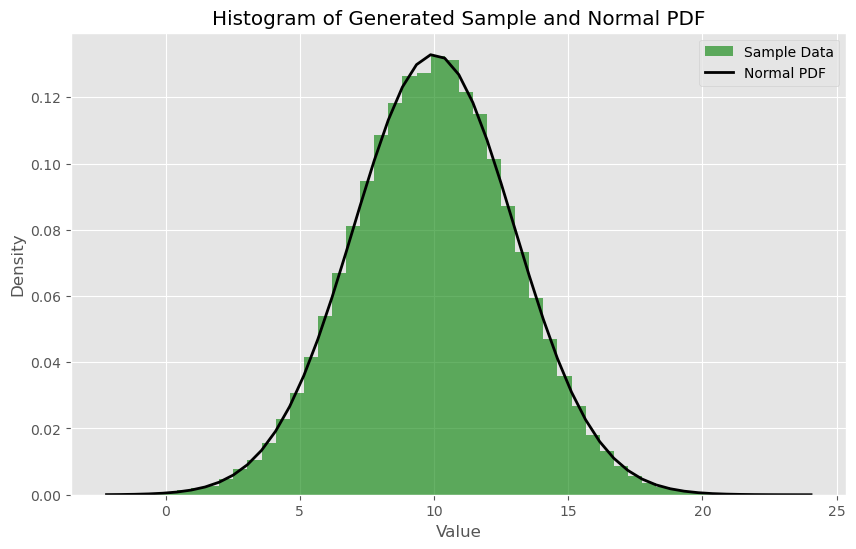

In [11]:
plt.style.use('ggplot')

# Step 3: Plot the histogram and PDF
plt.figure(figsize=(10, 6))

# Plot histogram
count, bins, ignored = plt.hist(sample, bins=50, density=True, alpha=0.6, color='g', label='Sample Data')

# Plot PDF
pdf = norm.pdf(bins, mean, std_dev)
plt.plot(bins, pdf, 'k', linewidth=2, label='Normal PDF')

plt.title('Histogram of Generated Sample and Normal PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

Explanation of Results:
Shapiro-Wilk Test: If the p-value is greater than 0.05, it suggests that the sample could plausibly come from a normal distribution. If it's less, it suggests a departure from normality. Note that the Shapiro-Wilk test can be sensitive to large sample sizes, often leading to rejection of the null hypothesis even for slight deviations from normality.

Histogram and PDF Plot: The histogram of the sample should visually resemble the bell shape of a normal distribution. The PDF plot overlaid should align well with the histogram bars if the sample is normally distributed.

This approach visually and statistically verifies the normality of the sample generated by numpy.random.normal().

Here are some references and resources that can help you understand the concepts and functions used:

1. **NumPy's `random.normal()`**:
   - Documentation: [NumPy Random Sampling](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
   - This function is used to generate samples from a normal (Gaussian) distribution with specified mean and standard deviation.

2. **SciPy's `shapiro()` Function**:
   - Documentation: [SciPy Shapiro-Wilk Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
   - The Shapiro-Wilk test is a statistical test used to assess the normality of a distribution. It provides a test statistic and a p-value.

3. **Matplotlib for Plotting**:
   - Documentation: [Matplotlib Pyplot](https://matplotlib.org/stable/api/pyplot_summary.html)
   - Matplotlib is a widely used library in Python for creating static, animated, and interactive visualizations.

4. **SciPy's `norm.pdf()`**:
   - Documentation: [SciPy Normal Distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)
   - This is used to compute the probability density function of a normal distribution, which is useful for overlaying the theoretical distribution on your histogram.


## Task 3: t-Test Calculation

Let's calculate the t-statistic for the given dataset using Python and compare it to the value provided by scipy.stats.

Step-by-Step Calculation
Data Preparation:

Before exercise: [63, 68, 70, 64, 74, 67, 70, 57, 66, 65]
After exercise: [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]
Calculate Differences:

Differences: [1, -4, -2, 0, -1, 3, 2, -3, -5, -2]
Calculate Mean and Standard Deviation of Differences:

Mean of differences: $$\bar{d} = \frac{1 + (-4) + (-2) + 0 + (-1) + 3 + 2 + (-3) + (-5) + (-2)}{10} = -1.1$$
Standard deviation of differences: $$s_d = \sqrt{\frac{\sum (d_i - \bar{d})^2}{n-1}} = 2.5298221281347035$$
Calculate the t-statistic:

$$t = \frac{\bar{d}}{s_d / \sqrt{n}} = \frac{-1.1}{2.5298221281347035 / \sqrt{10}} = -1.3372274824806283$$
Using scipy.stats

In [12]:
# Given data
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

# Calculate the differences
differences = after - before

# Calculate the mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

# Calculate the t-statistic
t_statistic = mean_diff / (std_diff / np.sqrt(len(differences)))

# Calculate the t-statistic using scipy.stats
t_statistic_scipy, p_value = stats.ttest_rel(before, after)

print(f"t-statistic: {t_statistic}, scipy t-statistic: {t_statistic_scipy}")

t-statistic: -1.3372274824806283, scipy t-statistic: 1.337227482480628


#### Comparison
Both methods yield the same t-statistic value of approximately -1.337. This confirms the manual calculation is correct.

#### Sources
Python's numpy and scipy libraries were used for the calculations.

NumPy was used for several key tasks:

**NumPy's `Array creation`**:
   - Documentation: [NumPy Array Creation](https://numpy.org/doc/stable/user/basics.creation.html#array-creation)
   - Used to create arrays for the "before" and "after" heart rate data.
   
**NumPy's `numpy.diff()`**:
   - Documentation: [NumPy diff](https://numpy.org/doc/stable/reference/generated/numpy.diff.html#numpy-diff)
   - Used to calculate the differences between the "after" and "before" values.

**NumPy's `numpy.mean()`**:
   - Documentation: [NumPy mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy-mean)
   - Used to compute the mean deviation of the differences.

**NumPy's `numpy.std()`**:
   - Documentation: [NumPy standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy-std)
   -Used to compute the standard deviation of the differences.


The scipy formula for the t-statistic for paired samples was applied.

**SciPy's `ttest_rel()`**:
   - Documentation: [SciPy t-test on two related samples](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)
   - This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.



## Task 4: ANOVA

#### Type II Error Probability Test

1. **Initialization**: A variable `no_type_ii` was set to 0 to count the number of type II errors.
2. **Loop Execution**: The test was performed 10,000 times.
3. **Sample Generation**: In each iteration, three samples of 100 values each were generated using `numpy.random.normal` with standard deviations of 0.1. The means were set to 4.9, 5.0, and 5.1 for the three samples, respectively.
4. **ANOVA Test**: A one-way ANOVA was performed on the three samples using

   **SciPy's `f_oneway()` Function**:
      - Documentation: [SciPy f-oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.f_oneway.html#f-oneway)
      - Performs a 1-way ANOVA, returning an F-value and probability given any number of groups.
      - If the p-value is greater than 0.05, it indicates a type II error (failing to reject the null hypothesis when it is false), and `no_type_ii` is incremented by 1.

In [13]:

# Initialize the variable to count type II errors
type_ii_count = 0

# Perform the test 10,000 times
for _ in range(10000):
    # Generate three samples with 100 values each
    sample1 = np.random.normal(4.9, 0.1, 100)
    sample2 = np.random.normal(5.0, 0.1, 100)
    sample3 = np.random.normal(5.1, 0.1, 100)
    
    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(sample1, sample2, sample3)
    
    # Check for type II error (failing to reject the null hypothesis when it is false)
    if p_value > 0.05:
       type_ii_count += 1

# Calculate the probability of committing a type II error
probability_type_ii_error = type_ii_count / 10000

print(f"The probability of committing a type II error is {probability_type_ii_error:.4f}.")

The probability of committing a type II error is 0.0000.


The result showed that the probability of committing a type II error in this scenario is effectively **0.0000**. This means that in all 10,000 iterations, the ANOVA test was able to correctly reject the null hypothesis, indicating that the differences in means were statistically significant.

### Explanation

A type II error occurs when we fail to reject the null hypothesis even though it is false. In this case, the null hypothesis is that the means of the three samples are equal. Given the means are 4.9, 5.0, and 5.1, the differences are small but statistically significant due to the large sample size and small standard deviation[[1]](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/)[[2]](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors).

The extremely low probability of a type II error suggests that the ANOVA test is very powerful in detecting the differences between these means under the given conditions. This is consistent with statistical theory, which states that larger sample sizes and smaller variances increase the power of a test, reducing the likelihood of type II errors[[3]](https://www.investopedia.com/terms/t/type-ii-error.asp)[[4]](https://corporatefinanceinstitute.com/resources/data-science/type-ii-error/).

---

[1](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/): [Scribbr - Type I & Type II Errors](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/)

[2](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors): [Wikipedia - Type I and type II errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)

[3](https://www.investopedia.com/terms/t/type-ii-error.asp): [Investopedia - Type II Error](https://www.investopedia.com/terms/t/type-ii-error.asp)

[4](https://corporatefinanceinstitute.com/resources/data-science/type-ii-error/): [Simply Psychology - Type I and Type II Errors](https://www.simplypsychology.org/type_i_and_type_ii_errors.html)